In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from os import walk
from os import makedirs
from skimage.color import label2rgb
from skimage.measure import label, regionprops
from skimage.segmentation import clear_border
%matplotlib inline

Creating an class that will contain all bale paths

In [2]:
class balefiles:
    def __init__ (self,path):
        self.main = path
        self.paths = []
        self.pathfiles = []
        self.names = []
        self.files = {}
        for (dirpath, dirnames, filenames) in walk(path):
            self.paths.extend(dirnames)
            break
        if 'Segmented' in self.paths:
            self.paths.remove('Segmented')
        self.paths.sort()
        self.paths = [p for p in self.paths]
    
    def files_in_path (self,path):
        temp = []
        for (dirpath, dirnames, filenames) in walk(self.main+path):
            temp.extend(filenames)
            break
        temp = [file for file in temp if '.JPG' in file]
        temp.sort()
        self.files[path]=temp
        return temp
    
    def getall (self):
        self.files = {}
        for path in self.paths:
            self.names.append(self.files_in_path(path))
        
        for i in range(len(self.paths)):
            self.pathfiles.append([self.main+self.paths[i]+'/'+name for name in self.files[self.paths[i]]])

In [3]:
def extract_bales(img):
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(img_gray,(45,3),0)
    blur = cv2.GaussianBlur(blur,(45,3),0)
    histeq = cv2.equalizeHist(blur)
    ret3,th3 = cv2.threshold(histeq,254,255,cv2.THRESH_BINARY)
    erosion = cv2.erode(th3,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20)),iterations = 1)
    final = cv2.dilate(erosion,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25)),iterations = 7)
    final = clear_border(final)
    return final

In [4]:
def rework(folder,j,db,mask,means,stds,img,rw=0):
    remove_flag=False
    label_image= label(mask)
    la,count = np.unique(label_image,return_counts=True)
    la = la[1:]
    count = count[1:]
    for i in range(len(count)):
        if (count[i]>(means[folder]+stds[folder]) or count[i]<(means[folder]-stds[folder])):
            #print(img.shape)
            rw +=1
            print('data/'+db.paths[folder]+'/'+db.names[folder][j])
            print('rework: ',rw)
            remove_flag=True
            mask = cv2.dilate(mask,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(100,100)),iterations = 1)
            inv_mask=255-(label_image==la[i])*mask
            new_img = cv2.bitwise_and(img,img,mask=inv_mask)
            final = extract_bales(new_img)
            np.save('data/'+str(folder)+'/masks/M-'+db.names[folder][j][:-4],final)
            res = np.hstack((new_img,cv2.bitwise_and(new_img,new_img,mask=final)))
            cv2.imwrite('data/Segmented/'+str(folder)+'/S-'+db.names[folder][j],res)
    if remove_flag:
        rework(folder,j,db,final,means,stds,new_img,rw=rw)

In [5]:
dbpath = '../Database/Bales/'

db = balefiles(dbpath)
db.getall()
# db.paths
# db.names
# db.pathfiles

In [6]:
%%time
folder = {}
for folder in range(len(db.paths)):
    try:
        makedirs('data/'+str(folder)+'/masks/')
    except:
        pass
    try:
        makedirs('data/Segmented/'+str(folder))
    except:
        pass
    for i in range(len(db.pathfiles[folder])):
        print(db.pathfiles[folder][i],end='\t')
        sample = db.pathfiles[folder][i]
        img = cv2.imread(sample)
        print('Extracting...',end='\t')
        final = extract_bales(img)
        print('DONE!',end='')
        print('Saving...',end='\t')
        np.save('data/'+str(folder)+'/masks/M-'+db.names[folder][i][:-4],final)
        res = np.hstack((img,cv2.bitwise_and(img,img,mask=final)))
        cv2.imwrite('data/Segmented/'+str(folder)+'/S-'+db.names[folder][i],res)
        print('DONE!')

../Database/Bales/0/DJI_0523.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0524.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0525.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0526.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0527.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0528.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0529.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0530.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0531.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0532.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0533.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0534.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0535.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0536.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0537.JPG	Extracting...	D

../Database/Bales/0/DJI_0643.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0644.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0645.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0646.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0647.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0648.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0649.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0650.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0651.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0652.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0653.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/0/DJI_0654.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/1/DJI_0290.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/1/DJI_0291.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/1/DJI_0292.JPG	Extracting...	D

../Database/Bales/2/DJI_0907.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0908.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0909.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0910.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0911.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0912.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0913.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0914.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0915.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0916.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0917.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0918.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0919.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0920.JPG	Extracting...	DONE!Saving...	DONE!
../Database/Bales/2/DJI_0921.JPG	Extracting...	D

In [12]:
%%time 
npynames = [[file[:-3]+'npy' for file in folders] for folders in db.names]
counts = {}
means = {}
stds = {}

for folder in range(len(npynames)):
    counts[folder] = []
    for file in npynames[folder]:
        img = np.load('data/'+db.paths[folder]+'/masks/M-'+file)
        try:
            label_image= label(img)
        except:
            print(type(img))
        _,count = np.unique(label_image,return_counts=True)
        counts[folder].extend(list(count[1:]))
    means[folder] = np.mean(counts[folder])
    stds[folder] = np.std(counts[folder])
    for j in range(len(npynames[folder])):
        img = cv2.imread('data/'+db.paths[folder]+'/'+db.names[folder][j])
        mask = np.load('data/'+db.paths[folder]+'/masks/M-'+npynames[folder][j])
        rework(folder,j,db,mask,means,stds,img)

data/0/DJI_0548.JPG
rework:  1
data/0/DJI_0549.JPG
rework:  1
data/0/DJI_0550.JPG
rework:  1
data/0/DJI_0550.JPG
rework:  2
data/0/DJI_0585.JPG
rework:  1
data/0/DJI_0586.JPG
rework:  1
data/0/DJI_0587.JPG
rework:  1
data/0/DJI_0587.JPG
rework:  2
data/0/DJI_0618.JPG
rework:  1
data/0/DJI_0619.JPG
rework:  1
data/0/DJI_0620.JPG
rework:  1
data/0/DJI_0621.JPG
rework:  1
data/0/DJI_0622.JPG
rework:  1
data/0/DJI_0622.JPG
rework:  2
data/0/DJI_0622.JPG
rework:  3
data/0/DJI_0652.JPG
rework:  1
data/1/DJI_0290.JPG
rework:  1
data/1/DJI_0291.JPG
rework:  1
data/1/DJI_0292.JPG
rework:  1
data/1/DJI_0297.JPG
rework:  1
data/1/DJI_0298.JPG
rework:  1
data/1/DJI_0301.JPG
rework:  1
data/1/DJI_0301.JPG
rework:  2
data/1/DJI_0301.JPG
rework:  3
data/1/DJI_0307.JPG
rework:  1
data/1/DJI_0307.JPG
rework:  2
data/1/DJI_0307.JPG
rework:  3
data/1/DJI_0307.JPG
rework:  4
data/1/DJI_0309.JPG
rework:  1
data/1/DJI_0313.JPG
rework:  1
data/1/DJI_0313.JPG
rework:  2
data/1/DJI_0317.JPG
rework:  1
data/1/D

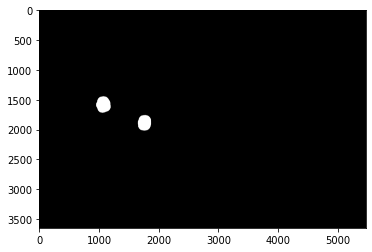

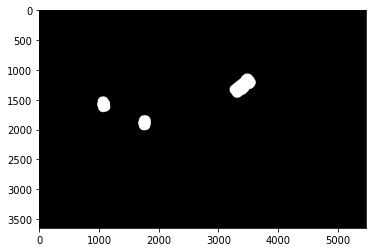

In [13]:
test_m = 'data/'+db.paths[1]+'/masks/M-'+db.names[1][0][:-3]+'npy'
test_o = 'data/'+db.paths[1]+'/'+db.names[1][0]
img_o = cv2.imread(test_o)
img_o = extract_bales(img_o)
img_1 = np.load(test_m)
plt.figure()
plt.imshow(img_1,cmap='gray')
plt.figure()
plt.imshow(img_o,cmap='gray')

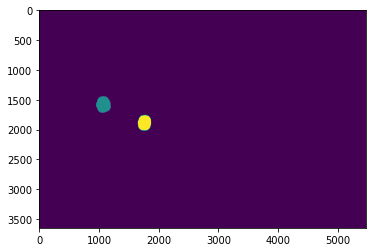

In [14]:
label_image = label(img_1)
plt.imshow(label_image)

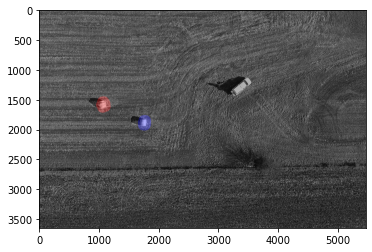

In [15]:
image_label_overlay = label2rgb(label_image, image=cv2.imread(test_o), bg_label=0)
plt.imshow(image_label_overlay)